In [1]:
import math
import time
import yfinance as yf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.stats import jarque_bera, skew, kurtosis
import statsmodels.api as sm
import statsmodels.stats.diagnostic as dg

# download the data for training, i.e. for testing the existence of holiday effect by regression

training_data = yf.download("KBE KIE XTN XRT XTL XLE XLB XSW XHE XHS", start="2012-1-9", end="2018-1-8") 

# take the "Adj Close" column from the dataframe

KBEclose = np.asarray(training_data["Adj Close"]["KBE"], float)
KIEclose = np.asarray(training_data["Adj Close"]["KIE"], float)
XTNclose = np.asarray(training_data["Adj Close"]["XTN"], float)
XRTclose = np.asarray(training_data["Adj Close"]["XRT"], float)
XTLclose = np.asarray(training_data["Adj Close"]["XTL"], float)
XLEclose = np.asarray(training_data["Adj Close"]["XLE"], float)
XLBclose = np.asarray(training_data["Adj Close"]["XLB"], float)
XSWclose = np.asarray(training_data["Adj Close"]["XSW"], float)
XHEclose = np.asarray(training_data["Adj Close"]["XHE"], float)
XHSclose = np.asarray(training_data["Adj Close"]["XHS"], float)
XHSEavg = (XHEclose + XHSclose) / 2 # combine XHE and XHS together to represent the whole health care sector

# create a dataframe that includes all the time series of continuously compounded daily returns

KBEr = []
KIEr = []
XTNr = []
XRTr = []
XTLr = []
XLEr = []
XLBr = []
XSWr = []
XHSEr = []

for i in range(len(XHSEavg) - 1):
    KBEr.append(math.log(KBEclose[i+1]/KBEclose[i]) * 100)
    KIEr.append(math.log(KIEclose[i+1]/KIEclose[i]) * 100)
    XTNr.append(math.log(XTNclose[i+1]/XTNclose[i]) * 100)
    XRTr.append(math.log(XRTclose[i+1]/XRTclose[i]) * 100)
    XTLr.append(math.log(XTLclose[i+1]/XTLclose[i]) * 100)
    XLEr.append(math.log(XLEclose[i+1]/XLEclose[i]) * 100)
    XLBr.append(math.log(XLBclose[i+1]/XLBclose[i]) * 100)
    XSWr.append(math.log(XSWclose[i+1]/XSWclose[i]) * 100)
    XHSEr.append(math.log(XHSEavg[i+1]/XHSEavg[i]) * 100)

d = {
    'KBEr': KBEr, 
    'KIEr': KIEr, 
    'XTNr': XTNr, 
    'XRTr': XRTr, 
    'XTLr': XTLr, 
    'XLEr': XLEr, 
    'XLBr': XLBr, 
    'XSWr': XSWr,
    'XHSEr': XHSEr
}

returns = pd.DataFrame(data=d, index=training_data.index[1:])
returns

[*********************100%***********************]  10 of 10 completed


,KBEr,KIEr,XTNr,XRTr,XTLr,XLEr,XLBr,XSWr,XHSEr
Date,,,,,,,,,
2012-01-10,1.270301,1.822797,0.000000,0.265442,1.169619,0.886125,1.848528,0.708591,0.869942
2012-01-11,0.791626,0.444069,2.501973,-0.056804,0.301900,-1.353498,0.981329,0.668542,1.148663
2012-01-12,0.231661,0.312249,0.568631,0.113609,1.609984,-0.941238,1.385467,0.472341,-0.189917
2012-01-13,-0.231661,-0.730116,-0.907121,-0.189442,-0.893833,-0.502759,-0.662611,-0.858847,-0.120254
2012-01-17,-0.885131,-0.183386,-0.275835,0.472926,0.000000,0.703170,0.552462,0.193429,0.138742
...,...,...,...,...,...,...,...,...,...
2017-12-29,-0.946073,-0.325197,-0.688412,-0.749745,-0.975881,-0.290211,-0.181573,0.115279,-0.712962
2018-01-02,0.274217,-1.278513,1.508358,1.820430,1.265401,1.633392,1.410789,0.187043,1.349895
2018-01-03,0.210439,0.164823,-0.393936,-0.065237,0.072202,1.486547,0.698001,0.844489,-0.144208


In [2]:
# descriptive statistics of all the return series

mean_return = np.mean(returns)
annualized_mean = mean_return * 250
std_deviation = np.std(returns)
skewness = skew(returns)
kurtosis_value = kurtosis(returns)
median_return = np.median(returns, axis=0)
jb_value, jb_p_value = jarque_bera(returns, axis=0)

# create a table of descriptive statistics

descriptive_stats = pd.DataFrame({'Sample Mean': mean_return,
                                  'Annualized Mean': annualized_mean,
                                  'Median': median_return,
                                  'Standard Deviation': std_deviation,
                                  'Skewness': skewness,
                                  'Kurtosis': kurtosis_value,
                                  'Jarque-Bera': jb_value,
                                  'Jarque-Bera p-value': jb_p_value
                                 })

descriptive_stats.index = pd.Series(['Banking', 'Insurance', 'Transportation', 'Retailing', 'Telecommunications', 'Energy', 'Materials', 'Software & Services', 'Healthcare'])

print('Table of Descriptive Statistics:')
descriptive_stats.round(4)

Table of Descriptive Statistics:


,Sample Mean,Annualized Mean,Median,Standard Deviation,Skewness,Kurtosis,Jarque-Bera,Jarque-Bera p-value
Banking,0.0614,15.3419,0.0948,1.2070,-0.3702,2.6224,466.5448,0.0
Insurance,0.0666,16.6398,0.0943,0.8410,-0.3724,1.7799,233.9021,0.0
Transportation,0.0724,18.0892,0.1082,1.1713,-0.3638,1.1193,111.9759,0.0
Retailing,0.0420,10.4956,0.0819,1.0744,-0.2814,0.6054,42.9236,0.0
Telecommunications,0.0390,9.7585,0.0000,1.0327,-0.3297,1.3403,140.2033,0.0
Energy,0.0134,3.3558,0.0227,1.2270,-0.1998,2.1132,290.6076,0.0
Materials,0.0475,11.8627,0.0795,0.9889,-0.2842,1.3144,128.8428,0.0
Software & Services,0.0670,16.7551,0.0886,1.0407,-0.5921,2.1523,379.1885,0.0
Healthcare,0.0655,16.3786,0.1183,0.9116,-0.6135,2.1838,394.2305,0.0


In [3]:
# training dates collection

def str_to_time(s):
    return [pd.to_datetime(t) for t in s]

MLK_pre = str_to_time(["2012-01-13 00:00:00", "2013-01-18 00:00:00", "2014-01-17 00:00:00", "2015-01-16 00:00:00", "2016-01-15 00:00:00", "2017-01-13 00:00:00"]) # the last day the stock market worked before Martin Luther King Jr. Day
MLK_post = str_to_time(["2012-01-17 00:00:00", "2013-01-22 00:00:00", "2014-01-21 00:00:00", "2015-01-20 00:00:00", "2016-01-19 00:00:00", "2017-01-17 00:00:00"]) # the first day the stock market worked after Martin Luther King Jr. Day
Presd_pre = str_to_time(["2012-02-17 00:00:00", "2013-02-15 00:00:00", "2014-02-14 00:00:00", "2015-02-13 00:00:00", "2016-02-12 00:00:00", "2017-02-17 00:00:00"]) # the last day the stock market worked before Presidents' Day
Presd_post = str_to_time(["2012-02-21 00:00:00", "2013-02-19 00:00:00", "2014-02-18 00:00:00", "2015-02-17 00:00:00", "2016-02-16 00:00:00", "2017-02-21 00:00:00"]) # the first day the stock market worked after Presidents' Day
Easter_pre = str_to_time(["2012-04-05 00:00:00", "2013-03-28 00:00:00", "2014-04-17 00:00:00", "2015-04-02 00:00:00", "2016-03-24 00:00:00", "2017-04-13 00:00:00"]) # the last day the stock market worked before Easter
Easter_post = str_to_time(["2012-04-09 00:00:00", "2013-04-01 00:00:00", "2014-04-21 00:00:00", "2015-04-06 00:00:00", "2016-03-28 00:00:00", "2017-04-17 00:00:00"]) # the first day the stock market worked after Easter
Memorial_pre = str_to_time(["2012-05-25 00:00:00", "2013-05-24 00:00:00", "2014-05-23 00:00:00", "2015-05-22 00:00:00", "2016-05-27 00:00:00", "2017-05-26 00:00:00"]) # the last day the stock market worked before Memorial Day
Memorial_post = str_to_time(["2012-05-29 00:00:00", "2013-05-28 00:00:00", "2014-05-27 00:00:00", "2015-05-26 00:00:00", "2016-05-31 00:00:00", "2017-05-30 00:00:00"]) # the first day the stock market worked after Memorial Day
Indep_pre = str_to_time(["2012-07-03 00:00:00", "2013-07-03 00:00:00", "2014-07-03 00:00:00", "2015-07-02 00:00:00", "2016-07-01 00:00:00", "2017-07-03 00:00:00"]) # the last day the stock market worked before Independence Day
Indep_post = str_to_time(["2012-07-05 00:00:00", "2013-07-05 00:00:00", "2014-07-07 00:00:00", "2015-07-06 00:00:00", "2016-07-05 00:00:00", "2017-07-05 00:00:00"]) # the first day the stock market worked after Independence Day
Labor_pre = str_to_time(["2012-08-31 00:00:00", "2013-08-30 00:00:00", "2014-08-29 00:00:00", "2015-09-04 00:00:00", "2016-09-02 00:00:00", "2017-09-01 00:00:00"]) # the last day the stock market worked before Labor Day
Labor_post = str_to_time(["2012-09-04 00:00:00", "2013-09-03 00:00:00", "2014-09-02 00:00:00", "2015-09-08 00:00:00", "2016-09-06 00:00:00", "2017-09-05 00:00:00"]) # the first day the stock market worked after Labor Day
Thxg_pre = str_to_time(["2012-11-21 00:00:00", "2013-11-27 00:00:00", "2014-11-26 00:00:00", "2015-11-25 00:00:00", "2016-11-23 00:00:00", "2017-11-22 00:00:00"]) # the last day the stock market worked before Thanksgiving
Thxg_post = str_to_time(["2012-11-23 00:00:00", "2013-11-29 00:00:00", "2014-11-28 00:00:00", "2015-11-27 00:00:00", "2016-11-25 00:00:00", "2017-11-24 00:00:00"]) # the first day the stock market worked after Thanksgiving
Xmas_pre = str_to_time(["2012-12-24 00:00:00", "2013-12-24 00:00:00", "2014-12-24 00:00:00", "2015-12-24 00:00:00", "2016-12-23 00:00:00", "2017-12-22 00:00:00"]) # the last day the stock market worked before Christmas
Xmas_post = str_to_time(["2012-12-26 00:00:00", "2013-12-26 00:00:00", "2014-12-26 00:00:00", "2015-12-28 00:00:00", "2016-12-27 00:00:00", "2017-12-26 00:00:00"]) # the first day the stock market worked after Christmas
Newy_pre = str_to_time(["2012-12-31 00:00:00", "2013-12-31 00:00:00", "2014-12-31 00:00:00", "2015-12-31 00:00:00", "2016-12-30 00:00:00", "2017-12-29 00:00:00"]) # the last day the stock market worked before New Year's Day
Newy_post = str_to_time(["2013-01-02 00:00:00", "2014-01-02 00:00:00", "2015-01-02 00:00:00", "2016-01-04 00:00:00", "2017-01-03 00:00:00", "2018-01-03 00:00:00"]) # the first day the stock market worked after New Year's Day

# Create indicator series for pre/post-holiday effect
returns["MLK_pre"] = returns.index.isin(MLK_pre).astype(int)
returns["MLK_post"] = returns.index.isin(MLK_post).astype(int)
returns["Presd_pre"] = returns.index.isin(Presd_pre).astype(int)
returns["Presd_post"] = returns.index.isin(Presd_post).astype(int)
returns["Easter_pre"] = returns.index.isin(Easter_pre).astype(int)
returns["Easter_post"] = returns.index.isin(Easter_post).astype(int)
returns["Memorial_pre"] = returns.index.isin(Memorial_pre).astype(int)
returns["Memorial_post"] = returns.index.isin(Memorial_post).astype(int)
returns["Indep_pre"] = returns.index.isin(Indep_pre).astype(int)
returns["Indep_post"] = returns.index.isin(Indep_post).astype(int)
returns["Labor_pre"] = returns.index.isin(Labor_pre).astype(int)
returns["Labor_post"] = returns.index.isin(Labor_post).astype(int)
returns["Thxg_pre"] = returns.index.isin(Thxg_pre).astype(int)
returns["Thxg_post"] = returns.index.isin(Thxg_post).astype(int)
returns["Xmas_pre"] = returns.index.isin(Xmas_pre).astype(int)
returns["Xmas_post"] = returns.index.isin(Xmas_post).astype(int)
returns["Newy_pre"] = returns.index.isin(Newy_pre).astype(int)
returns["Newy_post"] = returns.index.isin(Newy_post).astype(int)

returns

,KBEr,KIEr,XTNr,XRTr,XTLr,XLEr,XLBr,XSWr,XHSEr,MLK_pre,...,Indep_pre,Indep_post,Labor_pre,Labor_post,Thxg_pre,Thxg_post,Xmas_pre,Xmas_post,Newy_pre,Newy_post
Date,,,,,,,,,,,,,,,,,,,,,
2012-01-10,1.270301,1.822797,0.000000,0.265442,1.169619,0.886125,1.848528,0.708591,0.869942,0,...,0,0,0,0,0,0,0,0,0,0
2012-01-11,0.791626,0.444069,2.501973,-0.056804,0.301900,-1.353498,0.981329,0.668542,1.148663,0,...,0,0,0,0,0,0,0,0,0,0
2012-01-12,0.231661,0.312249,0.568631,0.113609,1.609984,-0.941238,1.385467,0.472341,-0.189917,0,...,0,0,0,0,0,0,0,0,0,0
2012-01-13,-0.231661,-0.730116,-0.907121,-0.189442,-0.893833,-0.502759,-0.662611,-0.858847,-0.120254,1,...,0,0,0,0,0,0,0,0,0,0
2012-01-17,-0.885131,-0.183386,-0.275835,0.472926,0.000000,0.703170,0.552462,0.193429,0.138742,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-12-29,-0.946073,-0.325197,-0.688412,-0.749745,-0.975881,-0.290211,-0.181573,0.115279,-0.712962,0,...,0,0,0,0,0,0,0,0,1,0
2018-01-02,0.274217,-1.278513,1.508358,1.820430,1.265401,1.633392,1.410789,0.187043,1.349895,0,...,0,0,0,0,0,0,0,0,0,0
2018-01-03,0.210439,0.164823,-0.393936,-0.065237,0.072202,1.486547,0.698001,0.844489,-0.144208,0,...,0,0,0,0,0,0,0,0,0,1


In [4]:
# regression (heteroskedasticity-and-autocorrelation-consistent standard errors corrected)

for i in range(9):
    y = returns.iloc[:,i]
    x = returns.iloc[:,9:]
    x = sm.add_constant(x)
    model = sm.OLS(y, x).fit().get_robustcov_results(cov_type = 'HAC', maxlags = 5)
    
    # display all dates with a significant positive holiday effect (p<0.05)
    
    print(f'{list(returns)[i]}:')
    if model.summary2().tables[1][(model.summary2().tables[1].iloc[:,3]<=0.05)&(model.summary2().tables[1].iloc[:,0]>0)].empty:
        print('It doesn\'t show any holiday effect!')
    elif list(model.summary2().tables[1][(model.summary2().tables[1].iloc[:,3]<=0.05)&(model.summary2().tables[1].iloc[:,0]>0)].index) == ['const']:
        print('It doesn\'t show any holiday effect!')
    else:
        print(np.round(model.summary2().tables[1][(model.summary2().tables[1].iloc[:,3]<=0.05)&(model.summary2().tables[1].iloc[:,0]>0)][1:], 4)) 
    print('\n')

KBEr:
It doesn't show any holiday effect!


KIEr:
             Coef.  Std.Err.       t   P>|t|  [0.025  0.975]
Presd_post  0.4599    0.1512  3.0407  0.0024  0.1632  0.7566


XTNr:
            Coef.  Std.Err.       t   P>|t|  [0.025  0.975]
Indep_pre  0.6545    0.2552  2.5648  0.0104  0.1539  1.1551


XRTr:
          Coef.  Std.Err.       t   P>|t|  [0.025  0.975]
Thxg_pre  0.471    0.2036  2.3133  0.0208  0.0716  0.8704


XTLr:
            Coef.  Std.Err.       t   P>|t|  [0.025  0.975]
Thxg_pre   0.6390    0.1217  5.2504  0.0000  0.4002  0.8777
Thxg_post  0.4763    0.1906  2.4984  0.0126  0.1023  0.8503


XLEr:
            Coef.  Std.Err.       t   P>|t|  [0.025  0.975]
Indep_pre  0.9176    0.3625  2.5316  0.0115  0.2066  1.6286


XLBr:
It doesn't show any holiday effect!


XSWr:
             Coef.  Std.Err.       t   P>|t|  [0.025  0.975]
Presd_post  1.0710    0.3276  3.2689  0.0011  0.4283  1.7136
Labor_post  0.6933    0.3478  1.9933  0.0464  0.0111  1.3755
Thxg_pre    0.4523    0.1

In [5]:
# download the data for testing the strategy

testing_data = yf.download("SPY KBE KIE XTN XRT XTL XLE XLB XSW XHE XHS ^IRX", start="2018-1-8", end="2023-1-8")

# take the "Adj Close" column from the dataframe

SPYclose_test = np.asarray(testing_data["Adj Close"]["SPY"], float)
KBEclose_test = np.asarray(testing_data["Adj Close"]["KBE"], float)
KIEclose_test = np.asarray(testing_data["Adj Close"]["KIE"], float)
XTNclose_test = np.asarray(testing_data["Adj Close"]["XTN"], float)
XRTclose_test = np.asarray(testing_data["Adj Close"]["XRT"], float)
XTLclose_test = np.asarray(testing_data["Adj Close"]["XTL"], float)
XLEclose_test = np.asarray(testing_data["Adj Close"]["XLE"], float)
XLBclose_test = np.asarray(testing_data["Adj Close"]["XLB"], float)
XSWclose_test = np.asarray(testing_data["Adj Close"]["XSW"], float)
XHEclose_test = np.asarray(testing_data["Adj Close"]["XHE"], float)
XHSclose_test = np.asarray(testing_data["Adj Close"]["XHS"], float)
XHSEavg_test = (XHEclose_test + XHSclose_test) / 2

# create a dataframe that includes all the time series of adjusted close prices
d = {
    'SPY': SPYclose_test,  
    'KBE': KBEclose_test, 
    'KIE': KIEclose_test, 
    'XTN': XTNclose_test, 
    'XRT': XRTclose_test, 
    'XTL': XTLclose_test, 
    'XLE': XLEclose_test, 
    'XLB': XLBclose_test, 
    'XSW': XSWclose_test,
    'XHSE': XHSEavg_test,
    'IRX': np.asarray(testing_data["Adj Close"]["^IRX"], float)
}

adj_closes = pd.DataFrame(data=d, index=testing_data.index[:])
adj_closes

[*********************100%***********************]  12 of 12 completed


,SPY,KBE,KIE,XTN,XRT,XTL,XLE,XLB,XSW,XHSE,IRX
Date,,,,,,,,,,,
2018-01-08,250.538849,42.132160,27.638044,62.769405,42.528179,66.382545,58.300976,56.542156,71.048058,63.226389,1.380
2018-01-09,251.105927,42.683548,27.683170,62.864162,42.078094,65.920753,58.154121,56.452324,71.008537,63.591539,1.415
2018-01-10,250.721771,43.261181,27.746355,63.157879,42.381214,65.091469,58.084534,56.111012,71.156776,63.449169,1.395
2018-01-11,252.551056,43.821301,27.990063,64.948578,43.428352,65.996162,59.274990,56.847546,71.887993,64.453407,1.403
2018-01-12,254.197418,44.075115,28.062273,65.337051,43.924355,66.618141,59.847015,56.937359,72.411690,65.017807,1.410
...,...,...,...,...,...,...,...,...,...,...,...
2022-12-30,380.975983,44.814342,40.807816,67.041946,60.245506,81.416840,86.566551,77.343597,108.656921,87.325371,4.260
2023-01-03,379.372131,44.635681,40.797848,66.722748,59.826927,82.075279,83.528259,77.263947,108.636932,86.705505,4.255
2023-01-04,382.300964,45.141888,41.266216,68.268875,61.411549,82.534195,83.518356,78.608101,110.206017,88.065365,4.400


In [6]:
# testing dates collection

Presd_post_test = str_to_time(["2018-02-20 00:00:00", "2019-02-19 00:00:00", "2020-02-18 00:00:00", "2021-02-16 00:00:00", "2022-02-22 00:00:00"])
Indep_pre_test = str_to_time(["2018-07-03 00:00:00", "2019-07-03 00:00:00", "2020-07-03 00:00:00", "2021-07-02 00:00:00", "2022-07-01 00:00:00"])
Labor_post_test = str_to_time(["2018-09-04 00:00:00", "2019-09-03 00:00:00", "2020-09-08 00:00:00", "2021-09-07 00:00:00", "2022-09-06 00:00:00"])
Thxg_pre_test = str_to_time(["2018-11-21 00:00:00", "2019-11-27 00:00:00", "2020-11-25 00:00:00", "2021-11-24 00:00:00", "2022-11-23 00:00:00"])
Thxg_post_test = str_to_time(["2018-11-23 00:00:00", "2019-11-29 00:00:00", "2020-11-27 00:00:00", "2021-11-26 00:00:00", "2022-11-25 00:00:00"])

In [7]:
# define a strategy function

def nonrisky_refined_holiday_strategy(pr2, in1, la2, th1, th2):
    K = [10000] # set $10,000 to be the initial capital
    win_count = 0 # count for trades that profit
    lose_count = 0 # count for trades that lose
    win_SPY_count = 0 # count for trades that win SPY
    lose_SPY_count = 0 # count for trades that lose SPY
    
    for i in range(1, len(adj_closes)):
        
        # long KIE, XLE, XSW and XHSE (1:2:3:2) with a full position at the market closure on the last day before Presidents' day and short at the closure on the first day after Presidents' day
        
        if list(adj_closes.index)[i] in pr2:
            K.append(K[i-1]/(adj_closes.iloc[i-1,2]/8+adj_closes.iloc[i-1,6]/4+adj_closes.iloc[i-1,8]*3/8+adj_closes.iloc[i-1,9]/4)*(adj_closes.iloc[i,2]/8+adj_closes.iloc[i,6]/4+adj_closes.iloc[i,8]/8*3+adj_closes.iloc[i,9]/4))
            if K[i] > K[i-1]:
                win_count += 1
            elif K[i] < K[i-1]:
                lose_count += 1
            if K[i] / K[i-1] >= adj_closes.iloc[i,0] / adj_closes.iloc[i-1,0]:
                win_SPY_count += 1
            else:
                lose_SPY_count += 1
                
        # long XTN, XTL and XLE (3:2:5) with a full position at the market closure on the second-to-last day before Independence Day and short at the closure on the last day
                
        elif list(adj_closes.index)[i] in in1:
            K.append(K[i-1]/(adj_closes.iloc[i-1,3]*3/10+adj_closes.iloc[i-1,4]*2/10+adj_closes.iloc[i-1,6]/2)*(adj_closes.iloc[i,3]*3/10+adj_closes.iloc[i,4]*2/10+adj_closes.iloc[i,6]/2))
            if K[i] > K[i-1]:
                win_count += 1
            elif K[i] < K[i-1]:
                lose_count += 1
            if K[i] / K[i-1] >= adj_closes.iloc[i,0] / adj_closes.iloc[i-1,0]:
                win_SPY_count += 1
            else:
                lose_SPY_count += 1
                
        # long XSW with a full position at the market closure on the last day before Labor Day and short at the closure on the first day after Labor Day     
                
        elif list(adj_closes.index)[i] in la2:
            K.append(K[i-1]/(adj_closes.iloc[i-1,8])*(adj_closes.iloc[i,8]))
            if K[i] > K[i-1]:
                win_count += 1
            elif K[i] < K[i-1]:
                lose_count += 1
            if K[i] / K[i-1] >= adj_closes.iloc[i,0] / adj_closes.iloc[i-1,0]:
                win_SPY_count += 1
            else:
                lose_SPY_count += 1
        
        # long XTN, XRT, XTL, XSW and XHSE (1:2:2:2:2) with a full position at the market closure on the second-to-last day before Thanksgiving and short at the closure on the last day
                
        elif list(adj_closes.index)[i] in th1:
            K.append(K[i-1]/(adj_closes.iloc[i-1,3]/2+adj_closes.iloc[i-1,4]+adj_closes.iloc[i-1,5]+adj_closes.iloc[i-1,8]+adj_closes.iloc[i-1,9])*(adj_closes.iloc[i,3]/2+adj_closes.iloc[i,4]+adj_closes.iloc[i,5]+adj_closes.iloc[i,8]+adj_closes.iloc[i,9]))
            if K[i] > K[i-1]:
                win_count += 1
            elif K[i] < K[i-1]:
                lose_count += 1
            if K[i] / K[i-1] >= adj_closes.iloc[i,0] / adj_closes.iloc[i-1,0]:
                win_SPY_count += 1
            else:
                lose_SPY_count += 1
         
        # long XTL and XHSE (1:1) with a full position at the market closure on the last day before Thanksgiving and short at the closure on the first day after Thanksgiving   
                
        elif list(adj_closes.index)[i] in th2:
            K.append(K[i-1]/(adj_closes.iloc[i-1,5]+adj_closes.iloc[i-1,9])*(adj_closes.iloc[i,5]+adj_closes.iloc[i,9]))
            if K[i] > K[i-1]:
                win_count += 1
            elif K[i] < K[i-1]:
                lose_count += 1
            if K[i] / K[i-1] >= adj_closes.iloc[i,0] / adj_closes.iloc[i-1,0]:
                win_SPY_count += 1
            else:
                lose_SPY_count += 1
                
        # non-risky-refined assumption: when we do not trade, we put all our money in the bank, and take 1-month treasury rate to be the non-risky interest rate
        
        else:
            K.append(K[i-1]*(1+adj_closes.iloc[i,10]/36000)) 
            
    adj_closes['Strategy Capital'] = K
    return adj_closes, win_count, lose_count, win_SPY_count, lose_SPY_count

# run the backtest

result, win, lose, win_SPY, lose_SPY = nonrisky_refined_holiday_strategy(Presd_post_test, Indep_pre_test, Labor_post_test, Thxg_pre_test, Thxg_post_test)

In [8]:
capital = result['Strategy Capital']
print(f'The final capital is ${capital[-1]:.0f}.') # show the final capital
print(f'The maximum capital is ${max(capital):.0f}.') # show the maximum capital
print(f'The minimum capital is ${min(capital):.0f}.') # show the minimum capital

daily_return = capital.pct_change() # generate a series for daily return
past_peaks = capital.cummax() # generate a series for cumulative maximum
max_drawdown = ((capital / past_peaks) - 1).min() 
print(f'The maximum drawdown is {100*max_drawdown:.2f}%.') # show maximum drawdown

sharpe_ratio = daily_return.mean() / daily_return.std() * np.sqrt(250) # compute Sharpe ratio
print(f'The Sharpe ratio is {sharpe_ratio:.2f}.')

The final capital is $10195.
The maximum capital is $10551.
The minimum capital is $9802.
The maximum drawdown is -7.10%.
The Sharpe ratio is 0.18.


There are 24 trades in total. Among them, we profit for 13 trades and lose for 11 trades. The winning rate is 54.17%.
There are 16 trades that win the daily profit of SPY, which is the ETF for S&P 500 index. The winning rate is 66.67%.
For the whole backtesting period, we have outperformed the S&P 500 index 15.25% of the time.


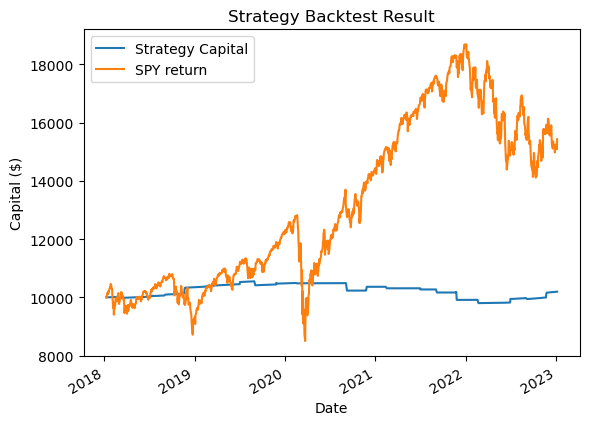

In [9]:
print(f'There are {win+lose} trades in total. Among them, we profit for {win} trades and lose for {lose} trades. The winning rate is {win/(win+lose):.2%}.')
print(f'There are {win_SPY} trades that win the daily profit of SPY, which is the ETF for S&P 500 index. The winning rate is {win_SPY/(win_SPY+lose_SPY):.2%}.')

result["SPY return"] = 10000/adj_closes.iloc[0,0]*adj_closes.iloc[:,0] # add a column to show the price change of SPY
strategy_return = result.iloc[:,11:13]

print(f'For the whole backtesting period, we have outperformed the S&P 500 index {len([x for x in result["Strategy Capital"]-result["SPY return"] if x >= 0])/len(list(result.index)):.2%} of the time.')

strategy_return.plot() # plot the results for our strategy and long-term SPY holding
plt.ylabel("Capital ($)")
plt.title("Strategy Backtest Result")
plt.show()